In [1]:
!pip install globe

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for globe: filename=globe-1.0.52-py3-none-any.whl size=23654 sha256=02639055bfc26366374a282091a7d9c86c18d7cf068005408f0010e84da4a958
  Stored in directory: /home/raj.ayush/.cache/pip/wheels/99/06/ad/716117f137638e9529bb35914dc09eee9947a8e63048122368
  Created wheel for pycurl: filename=pycurl-7.45.6-cp38-cp38-linux_x86_64.whl size=149675 sha256=f64f23921d81d20c082345246469f0022b4990cc8e72842967d4846139c01bd8
  Stored in directory: /home/raj.ayush/.cache/pip/wheels/9e/d8/b4/f1636fdd8c32dc17f41959d7ff69a545fedee705267efe716c
Successfully built globe pycurl


In [1]:
import xarray as xr
import glob

# 1. List all your NetCDF files
files = sorted(glob.glob("/home/raj.ayush/data/era5_t2m_dailymax_*.nc"))
print(f"Found {len(files)} files.")

# 2. Open and concatenate all files by coordinates (time axis)
ds = xr.open_mfdataset(files, combine='by_coords', parallel=True)

# 3. Save the concatenated dataset to a new NetCDF file
output_path = "/home/raj.ayush/data/main/era5_t2m_dailymax_all_years.nc"
ds.to_netcdf(output_path)

print(f"Concatenated file saved to {output_path}")

Found 40 files.
Concatenated file saved to /home/raj.ayush/data/main/era5_t2m_dailymax_all_years.nc


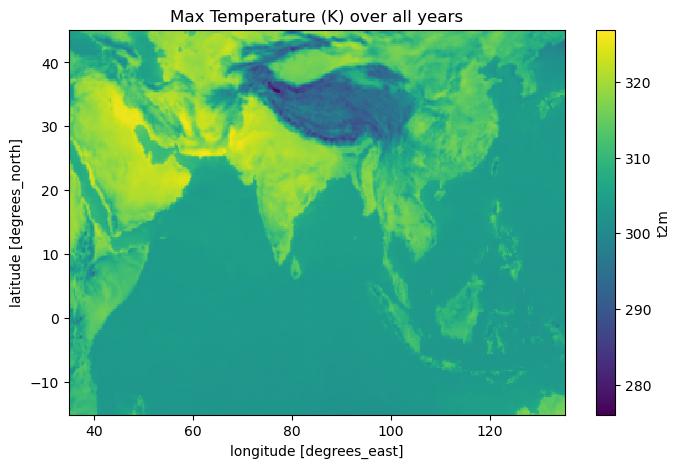

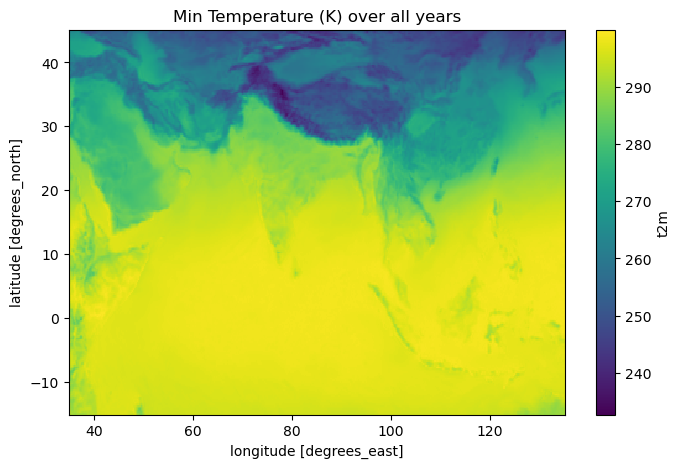

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# Open your concatenated NetCDF file
ds = xr.open_dataset("/home/raj.ayush/data/main/era5_t2m_dailymax_all_years.nc")

# Max temperature map (Kelvin)
t2m_max = ds['t2m'].max(dim='valid_time')
plt.figure(figsize=(8,5))
t2m_max.plot()
plt.title("Max Temperature (K) over all years")
plt.show()

# Min temperature map (Kelvin)
t2m_min = ds['t2m'].min(dim='valid_time')
plt.figure(figsize=(8,5))
t2m_min.plot()
plt.title("Min Temperature (K) over all years")
plt.show()

In [6]:
import xarray as xr

# Open your concatenated NetCDF file
ds = xr.open_dataset("/home/raj.ayush/data/main/era5_t2m_dailymax_all_years.nc")

# Show all variable names and dimensions
print(ds)

# Show coordinate values (latitude, longitude, time)
print("\nLatitude values:", ds['latitude'].values)
print("\nLongitude values:", ds['longitude'].values)
print("\nTime values (first 5):", ds['valid_time'].values[:5])

# Check resolution (difference between adjacent coordinates)
if 'latitude' in ds:
    lat_res = abs(ds['latitude'].values[1] - ds['latitude'].values[0])
    print(f"\nLatitude resolution: {lat_res} degrees")
if 'longitude' in ds:
    lon_res = abs(ds['longitude'].values[1] - ds['longitude'].values[0])
    print(f"Longitude resolution: {lon_res} degrees")

# Check shape (pixel density)
print(f"\nData shape (time, lat, lon): {ds['t2m'].shape}")

# Show global attributes/metadata
print("\nGlobal attributes:")
for k, v in ds.attrs.items():
    print(f"{k}: {v}")

# Show variable-specific attributes
print("\nVariable attributes for t2m:")
for k, v in ds['t2m'].attrs.items():
    print(f"{k}: {v}")

<xarray.Dataset>
Dimensions:     (valid_time: 14610, latitude: 241, longitude: 401)
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 45.0 44.75 44.5 44.25 ... -14.5 -14.75 -15.0
  * longitude   (longitude) float64 35.0 35.25 35.5 35.75 ... 134.5 134.8 135.0
  * valid_time  (valid_time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-08T12:42 GRIB to CDM+CF via cfgrib-0.9.1...

Latitude values: [ 45.    44.75  44.5   44.25  44.    43.75  43.5   43.25  43.    42.75
  42.5   42.25  42.    41.75  41.5   41.25  41.    40.75  40.5   40.25
  40.    39.75  39.5   39.25  39.    38.75  

In [21]:
import xarray as xr

# Open your dataset
ds = xr.open_dataset("/home/raj.ayush/data/main/era5_t2m_dailymax_all_years.nc")

# Rename 'valid_time' to 'time'
ds = ds.rename({'valid_time': 'time'})
ds.to_netcdf("/home/raj.ayush/data/main/era5_t2m_dailymax_all_years_time.nc")
# Now you can use ds['time'] as your time coordinate
print(ds)

<xarray.Dataset>
Dimensions:    (time: 14610, latitude: 241, longitude: 401)
Coordinates:
    number     int64 ...
  * latitude   (latitude) float64 45.0 44.75 44.5 44.25 ... -14.5 -14.75 -15.0
  * longitude  (longitude) float64 35.0 35.25 35.5 35.75 ... 134.5 134.8 135.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-08T12:42 GRIB to CDM+CF via cfgrib-0.9.1...


In [23]:
import xarray as xr

# Open your large dataset
ds = xr.open_dataset("data/main/40_years.nc")

# If needed, rename 'valid_time' to 'time'
if 'valid_time' in ds.dims:
    ds = ds.rename({'valid_time': 'time'})

# Select a small subset: every 8th latitude/longitude and first 2 years (adjust as needed)
ds_small = ds.isel(
    latitude=slice(0, None, 8),
    longitude=slice(0, None, 8),
    time=slice(0, 365*2)  # First 2 years (assuming daily data)
)

# Save the small dataset
ds_small.to_netcdf("data/main/test_data.nc")

print("Saved small test dataset as data/main/test_data.nc")

Saved small test dataset as data/main/test_data.nc


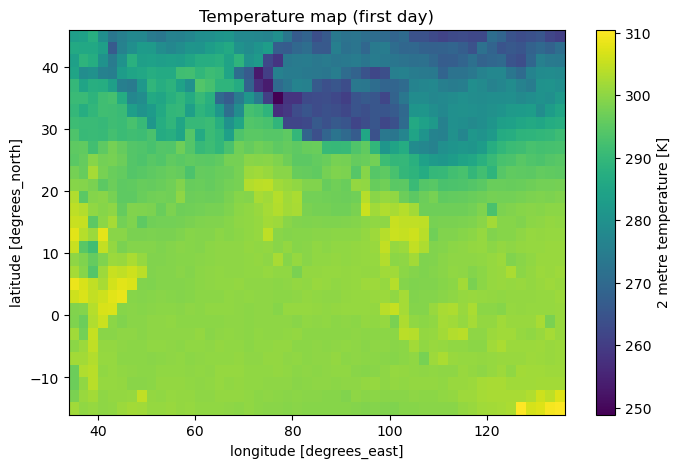

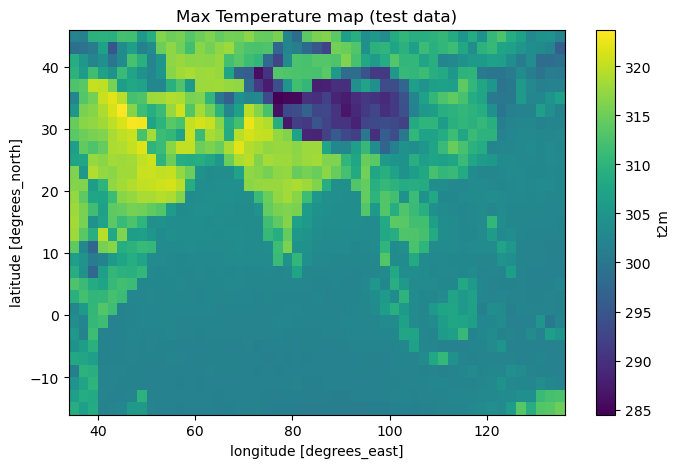

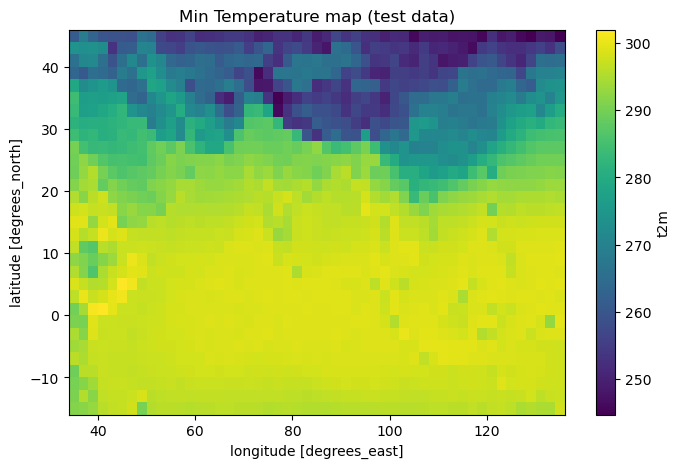

In [24]:
import xarray as xr
import matplotlib.pyplot as plt

# Open your small test dataset
ds = xr.open_dataset("data/main/test_data.nc")

# Plot temperature map for the first day
plt.figure(figsize=(8,5))
ds['t2m'].isel(time=0).plot()
plt.title("Temperature map (first day)")
plt.show()

# Plot max temperature map (over all selected days)
plt.figure(figsize=(8,5))
ds['t2m'].max(dim='time').plot()
plt.title("Max Temperature map (test data)")
plt.show()

# Plot min temperature map (over all selected days)
plt.figure(figsize=(8,5))
ds['t2m'].min(dim='time').plot()
plt.title("Min Temperature map (test data)")
plt.show()